## **Project Overview**
<u>Customer segmentation and churn mitigation</u>

This document is a continuation of our ongoing project aimed at identifying customer segments within the telecommunications company, which offers phone, internet, and other related services. Our goal is to target these segments with personalized offers to enhance customer retention. A key focus throughout this project is addressing customer churn, which we aim to mitigate through clustering techniques.

In the previous section, we prepared the data to ensure its completeness, with no missing values, correct data types, accurate labels, and proper encoding and scaling. We also applied PCA for dimensionality reduction, successfully reducing the number of columns from 24 to 15 while preserving approximately 90% of the variance.

In this section, we primarily focus on clustering. We will compare three different algorithms: K-means, hierarchical clustering, and DBSCAN. Additionally, we will visualize the clusters using t-SNE plots. Ultimately, we will select the best model and recommend targeted strategies for each customer segment.

#### Scope of work
1. <u>Data understanding & preparation:</u> 
    - data cleaning: 
        * row granularity
        * data types verification
        * feature selection - removing redundant columns 
        * handling missing values
        * converting categorical to numerical
        * scaling features (standardization)
    - EDA: 
        * correlation
        * feature importance from a basic logistic regression model
        * overall churn rate
        * plots 
    - Dimensionality reduction: 
        * PCA for feature engineering 
***
2. <u>Clustering:</u>
    - Algorithms: 
        * K-Means - evaluation based on inertia and silhouette score 
        * Hierarchial clustering
        * DBSCAN
        * t-SNE for visualizing clusters 
    - Recommendations:
        * cluster analyze to suggest targeted retention strategies  

### Table of contents
* [1. Import datasets](#chapter1)
* [2. K-Means clustering](#chapter2)
* [3. Hierarchial clustering](#chapter3)
* [4. DBSCAN](#chapter4)
* [5. t-SNE for cluster visualization](#chapter5)
* [6. Model comparison](#chapter6)
* [7. Model selection](#chapter7)
* [8. Recommendations](#chapter8)

## **Modules**

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN 
from sklearn.manifold import TSNE 
from sklearn.ensemble import IsolationForest 

## **1. Import datasets** <a id="chapter1"></a>

Cleaned dataset 

In [9]:
data_original = pd.read_pickle('Telco_Customer_Churn_original_ds_cleaned.pkl')
data_original

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Dataset after encoding and scaling

In [11]:
data_prepared = pd.read_pickle('Telco_Customer_Churn_ds_prepared.pkl')
data_prepared

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-0.633933,1.378241,-0.723968,...,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
1,-0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,1.577454,-0.725563,1.381277,...,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
2,-0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,1.577454,1.378241,-0.723968,...,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
3,-0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,1.577454,-0.725563,1.381277,...,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807
4,1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,...,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.170719,1.577454,-0.725563,1.381277,...,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
7039,1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.170719,-0.633933,1.378241,1.381277,...,-0.723740,1.129102,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,1.904590,-0.711026,-0.544807
7040,1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,-0.854176,1.577454,-0.725563,-0.723968,...,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
7041,-0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.170719,-0.633933,-0.725563,-0.723968,...,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513


Dataset cleaned + encoded + scaled + transformed (PCA)

In [13]:
data_transformed = pd.read_pickle('Telco_Customer_Churn_ds_pca_15_transformed.pkl')
data_transformed

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-1.267849,0.736237,3.064387,-0.827082,0.246671,1.327497,-1.765788,-0.340266,1.227473,0.345180,0.157598,-1.269342,-1.683941,0.636430,-0.267745
1,-0.548386,-1.943250,1.756119,2.446509,0.176010,-0.595344,1.516506,0.697399,-0.666808,0.600524,0.927121,0.656598,0.617381,-0.499653,-1.622902
2,-1.610391,-0.156265,2.416511,-0.146448,-0.050076,-0.632577,1.479277,-0.400686,-1.836693,1.092452,0.541348,-1.341737,-0.707463,-0.266983,-0.785796
3,1.104932,-2.246170,3.189648,1.757621,1.859509,-1.368357,-1.179881,1.050258,-0.435311,-0.576496,0.520804,0.929149,0.323413,-1.022800,-0.739782
4,-2.254277,2.316833,-0.007978,-0.166585,-0.056066,0.032837,-0.257767,-0.797810,0.725154,-0.939874,0.552762,-0.630854,-0.206368,-0.994414,0.018413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2.324539,-1.309426,1.243300,1.840975,0.397939,1.812629,2.316411,0.127933,-1.137944,0.415424,-0.832160,-0.346638,2.449432,0.461350,-0.287375
7039,3.292308,0.119054,-1.824342,2.046630,-1.281439,1.308122,-0.445332,-1.411687,0.115996,-0.240807,-1.434137,-0.101624,-0.984512,1.145490,-0.609368
7040,-1.013466,-0.112039,3.029126,-1.188206,0.343515,2.625379,-1.734955,-0.873241,0.802275,0.165459,0.402384,-0.743807,0.365265,-0.817981,-1.531148
7041,-1.744804,1.664548,-1.003846,-0.268426,-0.026393,0.017770,0.628421,0.354147,-1.281881,3.038131,-0.911461,-0.289081,0.900897,0.107886,-0.040855


## **2. K-Means clustering** <a id="chapter2"></a>

### **K-Means**

Choosing the best number of clusters based on inertia and silhouette score
I compare k from 2 to 15

In [17]:
inertia_values = []
silhouette_scores = []

for k in range(2,16): 
    kmeans = KMeans(n_clusters = k, n_init = 'auto', random_state = 30)
    kmeans.fit(data_transformed)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_transformed, kmeans.labels_, metric = 'euclidean',sample_size = None))

In [18]:
#inertia_values

In [19]:
#silhouette_scores

#### **Inertia**

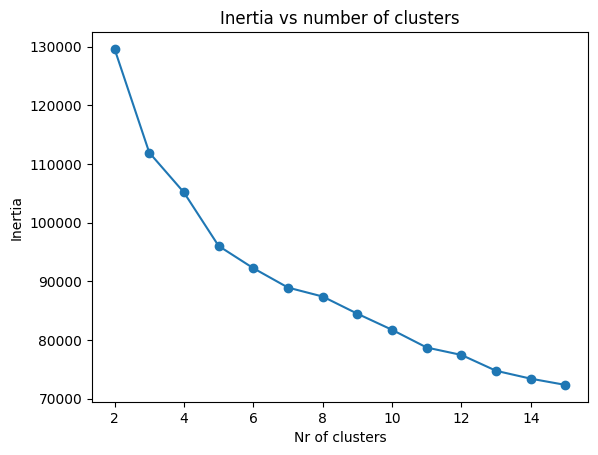

In [21]:
inertia_series = pd.Series(inertia_values, index = range(2,16))
inertia_series.plot(marker = 'o')
plt.xlabel('Nr of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs number of clusters');

In [22]:
# based on inertia (wcss) k = 5 - there is an elbow - inflection point where adding another cluster has a relatively small impact on inertia

#### **Silhouette score**

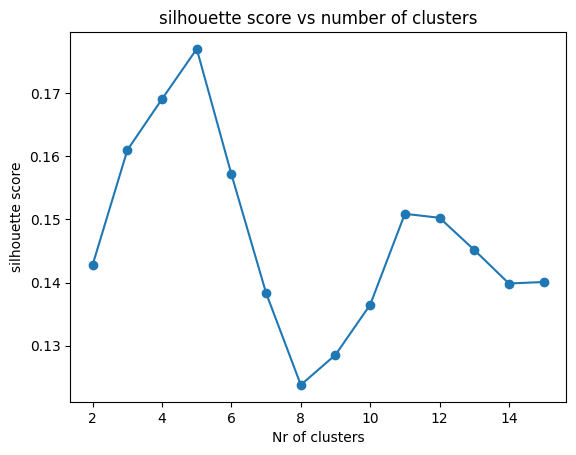

In [24]:
silhouette_series = pd.Series(silhouette_scores, index = range(2,16))
silhouette_series.plot(marker = 'o')
plt.xlabel('Nr of clusters')
plt.ylabel('silhouette score')
plt.title('silhouette score vs number of clusters');

In [25]:
silhouette_series.sort_values(ascending=False) # actually the differences are not high, they are even below 0.01

5     0.176989
4     0.169066
3     0.160979
6     0.157124
11    0.150882
12    0.150254
13    0.145166
2     0.142841
15    0.140088
14    0.139850
7     0.138326
10    0.136487
9     0.128562
8     0.123793
dtype: float64

In [26]:
# based on silhouette score k = 5 then k = 4 - the higher score, the better -> in this situation data points are highly matched to their own cluster 
# and poorly matched to other clusters 
# however silhouette score close to 0.2 is not high, is more close to 0 than 1, it is not the best result 

#### **k = 5**

Fit the model with 5 clusters + see the labels

In [29]:
kmeans_5 = KMeans(n_clusters = 5, n_init = 'auto', random_state = 42)
kmeans_5.fit(data_transformed)
kmeans_5_labels = kmeans_5.labels_

Counter(kmeans_5_labels)

Counter({1: 1968, 3: 1538, 2: 1245, 0: 1156, 4: 1136})

Examination of clusters

In [31]:
df_kmeans_5_labels = pd.DataFrame(kmeans_5_labels, columns = ['Cluster'])
#df_kmeans_5_labels

In [32]:
data_original_kmean_labels = pd.concat([data_original, df_kmeans_5_labels], axis=1)
data_original_kmean_labels

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,4
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,2
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


In [33]:
data_cluster_0 = data_original_kmean_labels[data_original_kmean_labels['Cluster'] == 0]
data_cluster_1 = data_original_kmean_labels[data_original_kmean_labels['Cluster'] == 1]
data_cluster_2 = data_original_kmean_labels[data_original_kmean_labels['Cluster'] == 2]
data_cluster_3 = data_original_kmean_labels[data_original_kmean_labels['Cluster'] == 3]
data_cluster_4 = data_original_kmean_labels[data_original_kmean_labels['Cluster'] == 4]

In [34]:
for feature in data_cluster_3:
    print()
    print(data_cluster_3[feature].value_counts()) 
    print()
    print('---------')


Gender
Male      786
Female    752
Name: count, dtype: int64

---------

SeniorCitizen
0    1486
1      52
Name: count, dtype: int64

---------

Partner
No     789
Yes    749
Name: count, dtype: int64

---------

Dependents
No     884
Yes    654
Name: count, dtype: int64

---------

Tenure
1     164
72     66
2      48
71     41
3      39
     ... 
54     10
31      9
28      9
43      9
0       6
Name: count, Length: 73, dtype: int64

---------

PhoneService
Yes    1538
Name: count, dtype: int64

---------

MultipleLines
No     1199
Yes     339
Name: count, dtype: int64

---------

InternetService
No             1521
Fiber optic       9
DSL               8
Name: count, dtype: int64

---------

OnlineSecurity
No internet service    1521
No                       14
Yes                       3
Name: count, dtype: int64

---------

OnlineBackup
No internet service    1521
No                       14
Yes                       3
Name: count, dtype: int64

---------

DeviceProtection
No int

In [35]:
data_cluster_4.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Cluster
count,1136.000000,1136.000000,1136.000000,1136.000000,1136.0
mean,0.213028,57.068662,101.614921,5834.816637,4.0
std,0.409628,14.510414,9.352664,1682.790987,0.0
min,0.000000,4.000000,65.200000,443.900000,4.0
25%,0.000000,49.000000,95.337500,4829.700000,4.0
50%,0.000000,61.000000,103.700000,6024.150000,4.0
75%,0.000000,69.000000,108.750000,7134.750000,4.0
max,1.000000,72.000000,118.750000,8684.800000,4.0


In [36]:
#cluster 0: has partner, has phone service, only DSL, has other services two/one year contact, automatic payments (credit card/bank transfer), no churn, 
#cluster 1: has partner, no dependents, everyone has phone service, multiple lines, fiber optic, no services,month to month, paperless billing, electronic check, churn yes
#cluster 2: has partner, no dependents, has phone service, no multiple lines, DSL, no other services, month to month, paperless billing, electronic check/mailed check, rather no churn
#cluster 3: has phone service, no multiple lines, no internet service, no other services,two year/month to month, no churn 
#cluster 4: has partner, no dependents, has phone service, has multiple lines, fiber optic, has other services, one/two year contracts, paperless billing, automatic payments/electronic check, no churn 

#in every cluster -> no senior and client has phone service

# cluster 2: mean/median tenure - around 10/15m ~ 1y, monthly charges around 50
# cluster 1: mean/median tenure - around 15/20m ~ 1/1.5y, monthly charges around 85 - why does monthly charges are so high when they don't use extra services? maybe because of the fiber optic?
# cluster 1 -> they churn 

# cluster 3: mean/median tenure - around 25/30m ~ 2/2.5y, monthly charges around 20 - phone service and nothing more 
# cluster 0: mean/median tenure - around 50m ~ 4y, monthly charges around 70
# cluster 4: mean/median tenure - around 60m ~ 5y, monthly charges around 100


# Recommendation -> make longer contracts, maybe not for 1 year, but for 6 months, the longest contract, the most probable is the client stay. 
# Lost of users maybe are worried/ scared long term contract, why not create shorter versions? 

How churn is distributed inside each group?

In [38]:
churn_clusters = pd.concat([data_original_kmean_labels['Churn'].map({'Yes':1, 'No':0}), data_original_kmean_labels['Cluster']], axis =1)
#churn_clusters

In [39]:
round(churn_clusters.groupby('Cluster')['Churn'].mean().sort_values(ascending = False)*100,2)
# in cluster1, more than 50% of clients leave, in cluster 2 more than 30% -> this is concerning
# in cluster 0 and 3 customers stay

Cluster
1    56.40
2    31.97
4    16.64
3     7.35
0     5.10
Name: Churn, dtype: float64

In [40]:
churn_clusters.groupby(['Cluster']).sum().sort_values('Churn', ascending = False)

,Churn
Cluster,
1,1110
2,398
4,189
3,113
0,59


Summary table for 5 clusters

|                   |      0       |         1         |   2   |    3    |         4         |
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
|  internet         |  DSL         |  fiber optic       |DSL   |  No     |  fiber optic        |
|  other services   |  Yes         |  No                |No    |  No     |  Yes                |
|  multiple lines   |  -           |  Yes               |No    |  No     |  Yes                |
|  contract         |  2/1y        | m-m                |m-m   |  2y/m-m |  1/2y               |
|  payment          |  automatic   |  electronic checks |checks|  mailed checks     |  automatic + electronic checks |
|  dependents       |  -           |  No                |No    |  -      |  No                 |
|  tenure  [year]   |  4           |  1/1.5             |1     |  2/2.5  |  5                  |    
| monthly charges [$] |  70        |  85                |50    |  20     |  100                |
|  churn      [%]   |  32.39       |  55.06             |3.76  |  14.45  |  4.25               |    

The one who churn has:
* fiber optic 
* no other services
* m-m contracts
* use electronic checks
* has no dependents
* low tenure around 1/1.5year
* quite high monthly charges around $85

Let's analyse also the model with k = 6 and k = 4

#### **k = 4**

In [46]:
kmeans_4 = KMeans(n_clusters = 4, n_init = 'auto', random_state = 42)
kmeans_4.fit(data_transformed)
kmeans_4_labels = kmeans_4.labels_
kmeans_4_cluster_centers = kmeans_4.cluster_centers_
Counter(kmeans_4_labels)

Counter({1: 3285, 3: 1527, 0: 1125, 2: 1106})

In [47]:
df_kmeans_4_labels = pd.DataFrame(kmeans_4_labels, columns = ['Cluster'])
#df_kmeans_5_labels

In [48]:
data_original_kmean_labels_4 = pd.concat([data_original, df_kmeans_4_labels], axis=1)
#data_original_kmean_labels_4

In [49]:
data_cluster_0kmeans4 = data_original_kmean_labels_4[data_original_kmean_labels_4['Cluster'] == 0]
data_cluster_1kmeans4 = data_original_kmean_labels_4[data_original_kmean_labels_4['Cluster'] == 1]
data_cluster_2kmeans4 = data_original_kmean_labels_4[data_original_kmean_labels_4['Cluster'] == 2]
data_cluster_3kmeans4 = data_original_kmean_labels_4[data_original_kmean_labels_4['Cluster'] == 3]

In [50]:
#pd.reset_option('display.max_rows')
for feature in data_cluster_1kmeans4:
    print()
    print(data_cluster_1kmeans4[feature].value_counts())  
    print()
    print('---------')


Gender
Male      1662
Female    1623
Name: count, dtype: int64

---------

SeniorCitizen
0    2496
1     789
Name: count, dtype: int64

---------

Partner
No     2111
Yes    1174
Name: count, dtype: int64

---------

Dependents
No     2692
Yes     593
Name: count, dtype: int64

---------

Tenure
1     447
2     192
3     160
4     137
5     105
     ... 
67      7
69      6
70      4
71      3
72      1
Name: count, Length: 72, dtype: int64

---------

PhoneService
Yes    2920
No      365
Name: count, dtype: int64

---------

MultipleLines
No                  1529
Yes                 1391
No phone service     365
Name: count, dtype: int64

---------

InternetService
Fiber optic    2101
DSL            1164
No               20
Name: count, dtype: int64

---------

OnlineSecurity
No                     2604
Yes                     661
No internet service      20
Name: count, dtype: int64

---------

OnlineBackup
No                     2258
Yes                    1007
No internet service 

In [51]:
#data_cluster_3kmeans4.describe()

In [52]:
# cluster0: has partner, has multiple lines, DSL, has other services, two-year, automatic payments, no churn 
# cluster1: no partner, fiber optic, no other services, month to month, electronic check -> no/yes churn 
# cluster2: has parnet, DSL/fiber optic, some people have other services, some of them no, one year, automatic payment or electonic check -> no churn 
# cluster3: no multiple lines, no internet, no other services, two year/month to month, no paperless billing, mailed check, no churn 

# cluster0: tenure mean/median: 61/67m ~ 5/5.5y , monthly charges: $84 
# cluster1: tenure mean/median: 19/13m ~ 1/1.5y, monthly charges: $73
# cluster2: tenure mean/median: 46/49m ~ 5y, monthly charges: $80 
# cluster3: tenure mean/median: 31/25m ~ 2/2.5y, monthly charges: $21 


# In each cluster: no senior citizen, no dependents, there is phone service

 How churn is distributed inside each group?

In [54]:
churn_clusters_kmeans_4 = pd.concat([data_original_kmean_labels_4['Churn'].map({'Yes':1, 'No':0}), data_original_kmean_labels_4['Cluster']], axis =1)
#churn_clusters_kmeans_4

In [55]:
round(churn_clusters_kmeans_4.groupby('Cluster')['Churn'].mean().sort_values(ascending = False) * 100, 2)
# around 50% clients from group 1 churn!! a lot, then clients leave from the 2nd group

Cluster
1    46.97
2    14.20
3     7.47
0     4.89
Name: Churn, dtype: float64

Summary table for 4 clusters

|                   |      0       |         1          |   2              |    3             |
|:--------:         |:--------:    |:--------:          |:--------:        |:--------:
|  internet         |  DSL         |  fiber optic       |DSL/fiber optic   |  No              |
|  other services   |  Yes         |  No                |Yes/No            |  No              |
|  multiple lines   |  -           | -                  |-                 |  No              |
|  contract         |  2y          | m-m                |1y                |  2y/m-m          |
|  payment          |  automatic   |  electronic checks |automatic /electronic checks   |  mailed checks/ no paperless billing |
|  tenure  [year]   |  5/5.5       |  1/1.5             |5                 |  2/2.5           |    
| monthly charges [$] |  84        |  73                |80                |  21              |
|  churn    [%]     |  4.89        |  46.97             |14.20             | 7.47              |  

The one who churn has: 
* fiber optic
* no other services
* m-m contracts
* use electronic checks
* low tenure around 1/1.5 year
* quite high monthly charges around $75

#### **k = 6**

In [60]:
kmeans_6 = KMeans(n_clusters =6, n_init = 'auto', random_state = 42)
kmeans_6.fit(data_transformed)
kmeans_6_labels = kmeans_6.labels_
kmeans_6_cluster_centers = kmeans_6.cluster_centers_
Counter(kmeans_6_labels)

Counter({1: 1967, 3: 1531, 5: 1206, 4: 1081, 0: 662, 2: 596})

In [61]:
df_kmeans_6_labels = pd.DataFrame(kmeans_6_labels, columns = ['Cluster'])
#df_kmeans_5_labels

In [62]:
data_original_kmean_labels_6 = pd.concat([data_original, df_kmeans_6_labels], axis=1)
data_original_kmean_labels_6

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,5
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,5
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,2
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,4
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,5
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


In [63]:
data_cluster_0kmeans6 = data_original_kmean_labels_6[data_original_kmean_labels_6['Cluster'] == 0]
data_cluster_1kmeans6 = data_original_kmean_labels_6[data_original_kmean_labels_6['Cluster'] == 1]
data_cluster_2kmeans6 = data_original_kmean_labels_6[data_original_kmean_labels_6['Cluster'] == 2]
data_cluster_3kmeans6 = data_original_kmean_labels_6[data_original_kmean_labels_6['Cluster'] == 3]
data_cluster_4kmeans6 = data_original_kmean_labels_6[data_original_kmean_labels_6['Cluster'] == 4]
data_cluster_5kmeans6 = data_original_kmean_labels_6[data_original_kmean_labels_6['Cluster'] == 5]

In [64]:
for feature in data_cluster_2kmeans6:
    print()
    print(data_cluster_2kmeans6[feature].value_counts())  
    print()
    print('---------')


Gender
Male      311
Female    285
Name: count, dtype: int64

---------

SeniorCitizen
0    544
1     52
Name: count, dtype: int64

---------

Partner
Yes    323
No     273
Name: count, dtype: int64

---------

Dependents
No     366
Yes    230
Name: count, dtype: int64

---------

Tenure
41    16
48    16
26    16
23    14
36    13
      ..
16     2
5      1
3      1
1      1
6      1
Name: count, Length: 69, dtype: int64

---------

PhoneService
Yes    452
No     144
Name: count, dtype: int64

---------

MultipleLines
No                  266
Yes                 186
No phone service    144
Name: count, dtype: int64

---------

InternetService
DSL            569
Fiber optic     27
Name: count, dtype: int64

---------

OnlineSecurity
Yes    346
No     250
Name: count, dtype: int64

---------

OnlineBackup
No     308
Yes    288
Name: count, dtype: int64

---------

DeviceProtection
Yes    318
No     278
Name: count, dtype: int64

---------

TechSupport
Yes    344
No     252
Name: count, 

In [65]:
#data_cluster_5kmeans6.describe()

In [66]:
# cluster0: has partner, DSL,has other services, two year, automatic payment  
# cluster1: no partner, no dependents, multiple lines, fiber optic, no other services, month to month, paperless billing + electronic check 
# cluster2: no dependents, no multiple lines, DSL, has/has not other services,one year, automatic payment, no churn 
# cluster3: no dependents, no multiple lines, no internet service, no other services, two year/month to month, no paperless billing + mailed check  
# cluster4: has partner, no dependents, has multiple lines, fiber optic, other services yes/no, one year/two year, automatic payment 
# cluster5: no partner, no dependents, no multiple lines, DSL, no other services, month to month, checks -> no churn 

# cluster0: tenure mean/median: 59/66m ~ 5/5.5y , monthly charges: $73 
# cluster1: tenure mean/median: 19/14m ~ 1/1.5y, monthly charges: $85
# cluster2: tenure mean/median: 40m ~ 3y, monthly charges: $62 
# cluster3: tenure mean/median: 31/25m ~ 2/2.5y, monthly charges: $21 
# cluster4: tenure mean/median: 57/62m ~ 5y, monthly charges: $103
# cluster5: tenure mean/median: 15/9m ~ 1y, monthly charges: $50

# in each cluster: no senior citizen, there is a phone service

 How churn is distributed inside each group?

In [68]:
churn_clusters_kmeans_6 = pd.concat([data_original_kmean_labels_6['Churn'].map({'Yes':1, 'No':0}), data_original_kmean_labels_6['Cluster']], axis =1)
#churn_clusters_kmeans_6

In [69]:
round(churn_clusters_kmeans_6.groupby('Cluster')['Churn'].mean().sort_values(ascending = False)*100,2)

Cluster
1    56.43
5    32.50
4    17.02
2     9.23
3     7.38
0     2.27
Name: Churn, dtype: float64

Summary table for 6 clusters

|                    |      0       |         1         |   2      |    3          |       4      |     5    |
|:--------:          |:--------:    |:--------:         |:--------:|:--------:     |:--------:    |:--------:|
|  internet          |  DSL         |  fiber optic      |DSL       |  No           |  fiber optic |DSL       |
|  other services    |  Yes         |  No               |Yes/No    |  No           |  Yes/no      |No        |
|  multiple lines    |  -           |  Yes              |No        |  No           |  Yes         | No       |
|  contract          |  2y          | m-m               | 1y       |  2y/m-m       |  1/2y        |m-m       |
|  payment           |  automatic   |  electronic checks|automatic |  mailed checks|  automatic   |checks    |
|  dependents        |  -           |  No               |No        |  No           |  No          |No        |
|  partner           |  Yes         |  No               |-         |  -            |  Yes         |No        |
|  tenure  [year]    |  5/5.5       |  1/1.5            |3         |  2/2.5        |  5           |1         |  
| monthly charges [$]|  73          |  85               |62        |  21           |  103         |50        |
|  churn [%]            |  2.27        |  56.43            |9.23      |  7.38         |  17.02       | 32.50    |  

The one who churn has: 
* fiber optic
* no other services
* has multiple lines
* m-m contracts
* use electronic checks
* has no dependents and no partner 
* low tenure around 1/1.5 year
* quite high monthly charges around $85

### **Comparison of K-Means Models with K = 4, K = 5, and K = 6**

In [74]:
total_observations = data_transformed.shape[0] 
total_observations

7043

In [75]:
def cluster_percent_distribution(counter):
    return {cluster: round((count / total_observations) * 100,2) for cluster, count in counter.items()}

In [76]:
cluster_percent_distribution(Counter(kmeans_4_labels) )

{1: 46.64, 2: 15.7, 3: 21.68, 0: 15.97}

In [77]:
cluster_percent_distribution(Counter(kmeans_5_labels) )

{2: 17.68, 0: 16.41, 1: 27.94, 3: 21.84, 4: 16.13}

In [78]:
cluster_percent_distribution(Counter(kmeans_5_labels))

{2: 17.68, 0: 16.41, 1: 27.94, 3: 21.84, 4: 16.13}

In [79]:
Counter(kmeans_4_labels) # the first cluster might be too large and could potentially be split into smaller clusters for a more balanced distribution
#Counter({1: 3285, 3: 1527, 0: 1125, 2: 1106})

Counter(kmeans_5_labels) #  the data points are most evenly distributed among the clusters, with each cluster having a similar size
#Counter({1: 1968, 3: 1538, 2: 1245, 0: 1156, 4: 1136})

Counter(kmeans_6_labels) #clusters 0 and 2 have relatively fewer data points and might benefit from being combined to achieve a more balanced clustering
#Counter({1: 1967, 3: 1531, 5: 1206, 4: 1081, 0: 662, 2: 596}) 

Counter({1: 1967, 3: 1531, 5: 1206, 4: 1081, 0: 662, 2: 596})

Model K = 4

|                           |      0       |         1          |   2              |    3             |
|:--------:                 |:--------:    |:--------:          |:--------:        |:--------:
|  internet                 |  DSL         |  fiber optic       |DSL/fiber optic   |  No              |
|  other services           |  Yes         |  No                |Yes/No            |  No              |
|  multiple lines           |  -           | -                  |-                 |  No              |
|  contract                 |  2y          | m-m                |1y                |  2y/m-m          |
|  payment                  |  automatic   |  electronic checks |automatic /electronic checks   |  mailed checks/ no paperless billing |
|  tenure  [year]           |  5/5.5       |  1/1.5             |5                 |  2/2.5           |    
| monthly charges [$]       |  84          |  73                |80                |  21              |
|  churn    [%]             |  4.89        |  46.97             |14.20             | 7.47             |  
|nr of observations         |  1125        |  3285              |1106              |  1527            | 
|distribution percentage [%]| 15.97        |  46.64             |15.7              |  21.68           | 

Model K = 5

|                           | 0            |         1          |   2      |    3        |         4           |
|:--------:                 |:--------:    |:--------:          |:--------:|:--------:   |:--------:           |
|  internet                 |  DSL         |  fiber optic       |DSL       |  No         |  fiber optic        |
|  other services           |  Yes         |  No                |No        |  No         |  Yes                |
|  multiple lines           |  -           |  Yes               |No        |  No         |  Yes                |
|  contract                 |  2/1y        | m-m                |m-m       |  2y/m-m     |  1/2y               |
|  payment                  |  automatic   |  electronic checks |checks    |mailed checks|  automatic + electronic checks |
|  dependents               |  -           |  No                |No        |  -          |  No                 |
|  tenure  [year]           |  4           |  1/1.5             |1         |  2/2.5      |  5                  |    
| monthly charges [$]       |  70          |  85                |50        |  20         |  100                |
|  churn       [%]          |  32.39       |  55.06             |3.76      |  14.45      |  4.25               |   
|nr of observations         |  1156        |  1968              |1245      |  1538       |  1136               |
|distribution percentage [%]| 16.41        |  27.94             |17.68     |  21.84      |  16.13              |

Model K = 6

|                           |      0       |         1         |   2      |    3          |       4      |     5    |
|:--------:                 |:--------:    |:--------:         |:--------:|:--------:     |:--------:    |:--------:|
|  internet                 |  DSL         |  fiber optic      |DSL       |  No           |  fiber optic |DSL       |
|  other services           |  Yes         |  No               |Yes/No    |  No           |  Yes/no      |No        |
|  multiple lines           |  -           |  Yes              |No        |  No           |  Yes         | No       |
|  contract                 |  2y          | m-m               | 1y       |  2y/m-m       |  1/2y        |m-m       |
|  payment                  |  automatic   |  electronic checks|automatic |  mailed checks|  automatic   |checks    |
|  dependents               |  -           |  No               |No        |  No           |  No          |No        |
|  partner                  |  Yes         |  No               |-         |  -            |  Yes         |No        |
|  tenure  [year]           |  5/5.5       |  1/1.5            |3         |  2/2.5        |  5           |1         |  
| monthly charges [$]       |  73          |  85               |62        |  21           |  103         |50        |
|  churn [%]                |  2.27        |  56.43            |9.23      |  7.38         |  17.02       | 32.50    |  
|nr of observations         |  662         |  1967             |596       |  1531         |  1081        | 1206     |
|distribution percentage [%]|  9.4         |  27.93            |8.46      |  21.74        |  15.35       | 17.12    |

At this point, I would consider only models with k = 5 or k = 6. The model with k = 4 has an uneven distribution, with nearly 50% of the total observations concentrated in a single cluster. This imbalance suggests that the clusters are not well-separated, leading to less distinct groupings. In contrast, the models with k=5 or k=6 provide a more balanced and clearly defined segmentation of the data

## **3. Hierarchial clustering** <a id="chapter3"></a>

How many clusters should we specify? 

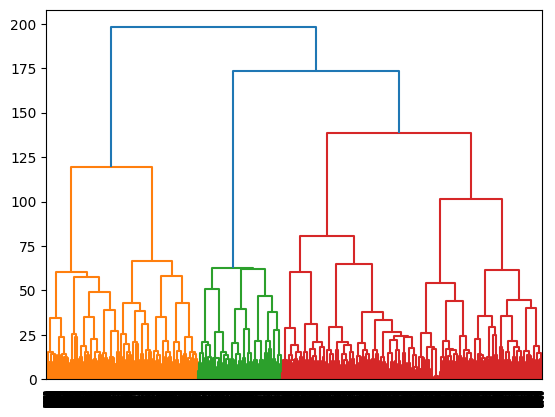

In [89]:
linkage_matrix = linkage(data_transformed, method='ward')
dendrogram_info = dendrogram(linkage_matrix)
# Looking at the plot, in my opinion, there are 5 clusters 

#### **Dendrogram with 5 clusters**

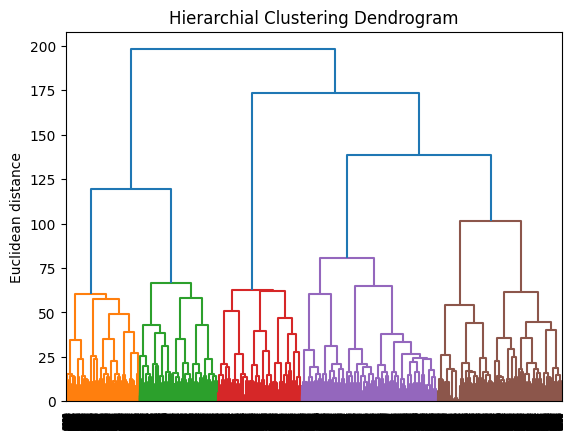

In [91]:
linkage_matrix = linkage(data_transformed, method='ward')
dendrogram_info = dendrogram(linkage_matrix, color_threshold = 105)
plt.title('Hierarchial Clustering Dendrogram')
plt.ylabel('Euclidean distance');
#plt.xlabel('Data points')

#### **AgglomerativeClustering with 5 clusters**

In [93]:
agg = AgglomerativeClustering(5)
agg.fit(data_transformed)
agg_labels_5 = agg.labels_
Counter(agg_labels_5)

Counter({1: 1924, 0: 1763, 2: 1197, 3: 1110, 4: 1049})

#### **Heatmap**

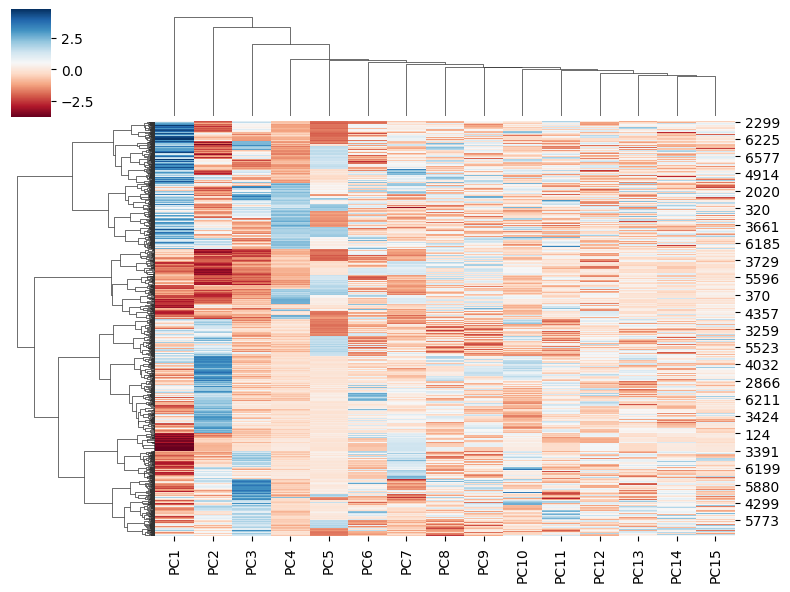

In [95]:
sns.clustermap(data_transformed, method ='ward', cmap='RdBu',figsize=(8,6),xticklabels = data_transformed.columns)
plt.show()

## **4. DBSCAN** <a id="chapter4"></a>

*min_samples* -> A typical rule of thumb:
- For low-dimensional data, set min_samples to a value between 4 and 5
- For higher dimensions, increase min_samples to account for the increased volume of space
- Another approach is to set min_samples to 2 * D, where D is the number of dimensions in your data



                                                 

*eps* -> Start by setting k to a value around the minimum number of points you expect to form a dense region like k = min_samples -1 

In [99]:
data_transformed.shape # we have 15D 

(7043, 15)

In [100]:
# min_samples = 30 -> 15*2 = 30 
# eps = 29 -> 30 - 1 

### **DBSCAN v1**

In [102]:
def tune_dbscan(data):
    results = []
    eps_values = np.arange(1,29,1)
    min_samples_values = np.arange(6,30,1)
    for eps in eps_values: 
        for min_samples in min_samples_values: 
            dbscan = DBSCAN(eps=eps, min_samples = min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)
            if n_clusters >1: 
                silhouette = silhouette_score(data, labels, metric = 'euclidean',sample_size = None)
            else:
                silhouette = None
            results.append([eps,min_samples,n_clusters,n_noise, silhouette])
    dbscan_results = pd.DataFrame(results,columns = ['Eps','Min Samples','Nr of clusters','Nr of noise points','Silhouette Score'])
    return dbscan_results

Silhouette score: 
- 1  the sample is very well clustered.
- 0  the sample is on or very close to the decision boundary between two neighboring clusters.
- -1 the sample is misclassified and may have been assigned to the wrong cluster.

In [104]:
# pd.set_option('display.max_rows', None)
#dbscan_results = tune_dbscan(data_transformed)
#dbscan_results

In [105]:
#dbscan_results.sort_values('Silhouette Score', ascending = False)
# The best scenario considering silhouette score: 
# eps = 3 min samples = 8 
# there will be 4 clusters and 195 noise points, silhouette score above 0, around 0.13 

# eps: from 4 silhouette score = NaN -> so we may only consider values below it, 3 is the best, 2 and 1 give the negative silhouette score
# min samples -> rather high

In [106]:
195/ data_transformed.shape[0] # around 2.8% of noise points

0.027687065171091863

### **DBSCAN v2**

In [108]:
def tune_dbscan_2(data):
    results = []
    eps_values = np.arange(3,4,.2) #[3. , 3.2, 3.4, 3.6, 3.8]
    min_samples_values = np.arange(5,25,1)
    for eps in eps_values: 
        for min_samples in min_samples_values: 
            dbscan = DBSCAN(eps=eps, min_samples = min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)
            if n_clusters >1: 
                silhouette = silhouette_score(data, labels, metric = 'euclidean',sample_size = None)
            else:
                silhouette = None
            results.append([eps,min_samples,n_clusters,n_noise, silhouette])
    dbscan_results = pd.DataFrame(results,columns = ['Eps','Min Samples','Nr of clusters','Nr of noise points','Silhouette Score'])
    return dbscan_results

In [109]:
# pd.set_option('display.max_rows', None)
# dbscan_results_v2 = tune_dbscan_2(data_transformed)
# dbscan_results_v2.sort_values('Silhouette Score', ascending = False)

In [110]:
# pd.reset_option('display.max_rows')

### **DBSCAN with eps = 3 and min_samples = 8**

In [112]:
dbscan = DBSCAN(eps =3, min_samples = 8)
dbscan.fit(data_transformed)
dbscan.labels_

array([0, 1, 1, ..., 0, 1, 3], dtype=int64)

In [113]:
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

4

## **5. t-SNE for cluster visualization** <a id="chapter5"></a>

After applying a clustering algorithms ( k-means, hierarchical clustering and DBSCAN) we can use t-SNE to project the clustered data into a 2D or 3D space.
This helps in visually assessing the clusters' separability and structure. If the clusters are well-separated in the t-SNE plot, it often indicates that the clustering algorithm has performed well.

t-SNE doesn’t focus on preserving the exact distances between data points. Instead, its goal is to show the relative relationships and similarities between points. It arranges points in a way that similar ones are placed close together, while dissimilar ones are kept farther apart.

Unlike linear dimensionality reduction methods like PCA, t-SNE is non-linear. This means it can capture more complex relationships in the data.

Applying PCA before t-SNE can sometimes lead to a loss of important variance in the data, especially if we reduce to very few components (e.g., 2 or 3); t-SNE works best when applied to the original, high-dimensional data or after minimal dimensionality reduction. I apply t-SNE directly to the original data (just scaled and encoded)

### **Kmeans**

#### **k=4**

In [121]:
#df_kmeans_4_labels

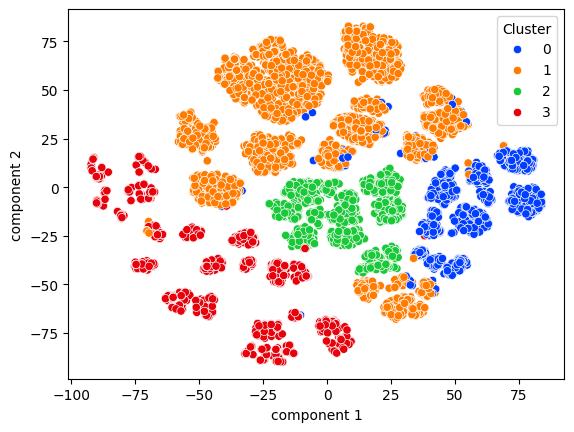

In [122]:
tsne_4 = TSNE(n_components = 2, random_state = 42)
data_tsne_4 = tsne_4.fit_transform(data_prepared)
df_tsne_4 = pd.DataFrame(data_tsne_4, columns = ['component 1', 'component 2'])
df_tsne_labels_kmeans4 = pd.concat([df_tsne_4,df_kmeans_4_labels], axis = 1)
sns.scatterplot(x = 'component 1', y = 'component 2', data = df_tsne_labels_kmeans4, hue = 'Cluster', palette ='bright');

#### **k=5**

In [124]:
#df_kmeans_5_labels

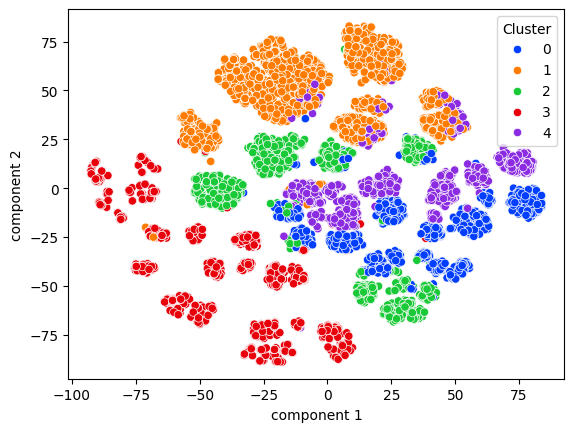

In [125]:
tsne_5 = TSNE(n_components = 2)
data_tsne_5 = tsne_5.fit_transform(data_prepared)
df_tsne_5 = pd.DataFrame(data_tsne_5, columns = ['component 1', 'component 2'])
df_tsne_labels_kmeans5 = pd.concat([df_tsne_5,df_kmeans_5_labels], axis = 1)
df_tsne_labels_kmeans5
sns.scatterplot(x = 'component 1', y = 'component 2', data = df_tsne_labels_kmeans5, hue = 'Cluster', palette ='bright');

|                           | 0            |         1          |   2      |    3        |         4           |
|:--------:                 |:--------:    |:--------:          |:--------:|:--------:   |:--------:           |
|  internet                 |  DSL         |  fiber optic       |DSL       |  No         |  fiber optic        |
|  other services           |  Yes         |  No                |No        |  No         |  Yes                |
|  multiple lines           |  -           |  Yes               |No        |  No         |  Yes                |
|  contract                 |  2/1y        | m-m                |m-m       |  2y/m-m     |  1/2y               |
|  payment                  |  automatic   |  electronic checks |checks    |mailed checks|  automatic + electronic checks |
|  dependents               |  -           |  No                |No        |  -          |  No                 |
|  tenure  [year]           |  4           |  1/1.5             |1         |  2/2.5      |  5                  |    
| monthly charges [$]       |  70          |  85                |50        |  20         |  100                |
|  churn                    |  No          |  Yes               |No/Yes    |  No         |  No                 |  
|nr of observations         |  1156        |  1968              |1245      |  1538       |  1136               |
|distribution percentage [%]| 16.41        |  27.94             |17.68     |  21.84      |  16.13              |

#### **Isolation Forest** for anomaly detection

##### **Contamination = 0.05**

In [129]:
data_transformed.shape[0] * 0.05

352.15000000000003

In [130]:
df_kmeans_5_v2 = pd.concat([data_prepared, df_kmeans_5_labels.copy()], axis =1)

In [131]:
from sklearn.ensemble import IsolationForest 
model_kmean_5_v2 = IsolationForest(contamination = 0.05, random_state = 42)
model_kmean_5_v2.fit(data_prepared.values)
df_kmeans_5_v2['anomaly_scores'] = model_kmean_5_v2.decision_function(data_prepared.values)
df_kmeans_5_v2['anomaly'] = model_kmean_5_v2.predict(data_prepared.values)

In [132]:
df_kmeans_5_v2.iloc[:,-3:].sort_values('anomaly_scores').head(50)

,Cluster,anomaly_scores,anomaly
4968,0,-0.039445,-1
510,4,-0.031835,-1
6763,0,-0.030627,-1
5717,0,-0.030512,-1
6296,0,-0.030351,-1
4612,0,-0.029396,-1
1169,0,-0.028386,-1
1584,0,-0.028270,-1
2344,0,-0.027672,-1
1580,0,-0.026294,-1


In [133]:
df_kmeans_5_v2.groupby('Cluster')['anomaly'].value_counts().unstack(fill_value=0)

anomaly,-1,1
Cluster,,
0,224,932
1,2,1966
2,34,1211
3,0,1538
4,93,1043


In [134]:
#Most of outliers are from cluster 0 and 4 

In [135]:
df_kmeans_5_without_anomalies_v2 = df_kmeans_5_v2[df_kmeans_5_v2['anomaly'] != -1].reset_index(drop=True)
df_kmeans_5_without_anomalies_v2

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cluster,anomaly_scores,anomaly
0,1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-0.633933,1.378241,-0.723968,...,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,2,0.074916,1
1,-0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,1.577454,-0.725563,1.381277,...,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,2,0.028282,1
2,-0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,1.577454,1.378241,-0.723968,...,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,2,0.103000,1
3,-0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,1.577454,-0.725563,1.381277,...,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807,0,0.000141,1
4,1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,...,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,1,0.171907,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6685,-0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.170719,1.577454,-0.725563,1.381277,...,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,0,0.009665,1
6686,1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.170719,-0.633933,1.378241,1.381277,...,-1.105970,1.944582,-0.562975,-0.529885,1.904590,-0.711026,-0.544807,4,0.036923,1
6687,1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,-0.854176,1.577454,-0.725563,-0.723968,...,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807,2,0.047519,1
6688,-0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.170719,-0.633933,-0.725563,-0.723968,...,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513,1,0.071675,1


In [136]:
# df_kmeans_5_without_anomalies_v2.iloc[:,:-3]

In [137]:
# df_kmeans_5_without_anomalies_v2.iloc[:,:-3].shape # less rows! 

##### **Contamination = 0.08**

In [139]:
data_transformed.shape[0] * 0.08

563.44

In [140]:
df_kmeans_5_v3 = pd.concat([data_prepared, df_kmeans_5_labels.copy()], axis =1)
from sklearn.ensemble import IsolationForest 
model_kmean_5_v3 = IsolationForest(contamination = 0.08, random_state = 42)
model_kmean_5_v3.fit(data_prepared.values)
df_kmeans_5_v3['anomaly_scores'] = model_kmean_5_v3.decision_function(data_prepared.values)
df_kmeans_5_v3['anomaly'] = model_kmean_5_v3.predict(data_prepared.values)
df_kmeans_5_without_anomalies_v3 = df_kmeans_5_v3[df_kmeans_5_v3['anomaly'] != -1].reset_index(drop=True)

In [141]:
df_kmeans_5_v3.groupby('Cluster')['anomaly'].value_counts().unstack(fill_value=0)

anomaly,-1,1
Cluster,,
0,340,816
1,7,1961
2,56,1189
3,1,1537
4,160,976


#### **t-SNE again** for kmean k=5

##### **+ Isolation Forest with contamination = 0.05**

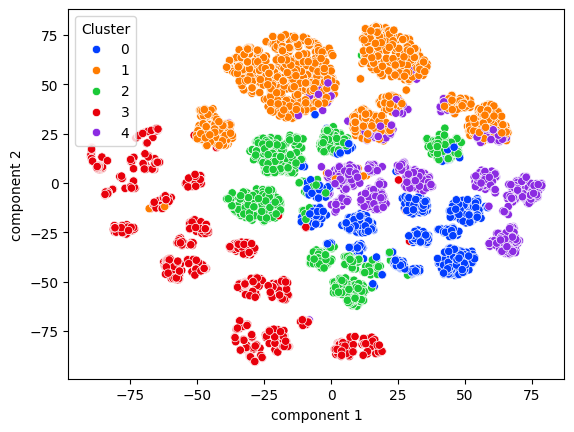

In [144]:
tsne_5_v2 = TSNE(n_components = 2)
data_tsne_v2 = tsne_5_v2.fit_transform(df_kmeans_5_without_anomalies_v2.iloc[:,:-3])
df_tsne_5_v2 = pd.DataFrame(data_tsne_v2, columns = ['component 1', 'component 2'])
df_tsne_labels_kmeans5_v2 = pd.concat([df_tsne_5_v2,df_kmeans_5_without_anomalies_v2['Cluster']], axis = 1)
df_tsne_labels_kmeans5_v2
sns.scatterplot(x = 'component 1', y = 'component 2', data = df_tsne_labels_kmeans5_v2, hue = 'Cluster', palette ='bright');

##### **+ Isolation Forest with contamination = 0.08**

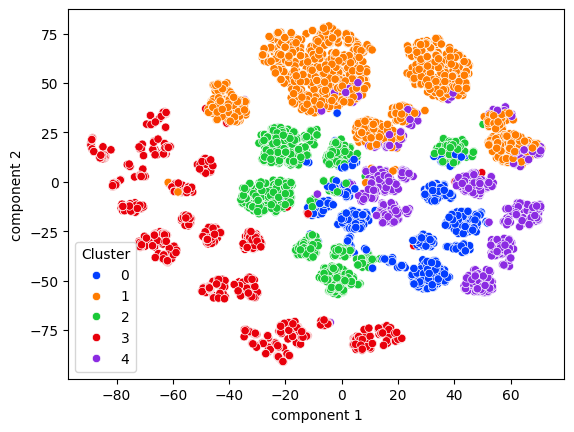

In [146]:
tsne_5_v3 = TSNE(n_components = 2)
data_tsne_v3 = tsne_5_v3.fit_transform(df_kmeans_5_without_anomalies_v3.iloc[:,:-3])
df_tsne_5_v3 = pd.DataFrame(data_tsne_v3, columns = ['component 1', 'component 2'])
df_tsne_labels_kmeans5_v3 = pd.concat([df_tsne_5_v3,df_kmeans_5_without_anomalies_v3['Cluster']], axis = 1)
df_tsne_labels_kmeans5_v3
sns.scatterplot(x = 'component 1', y = 'component 2', data = df_tsne_labels_kmeans5_v3, hue = 'Cluster', palette ='bright');

In [147]:
# Adding contamination, I notice that clusters are more put together, they create more dense/compact groups
# However, I did not notice a significant difference in clusters comparing models with removed 5% and 8% of observations, so that 
# I would pick model with less removed values

#### **k=6**

In [149]:
#df_kmeans_6_labels

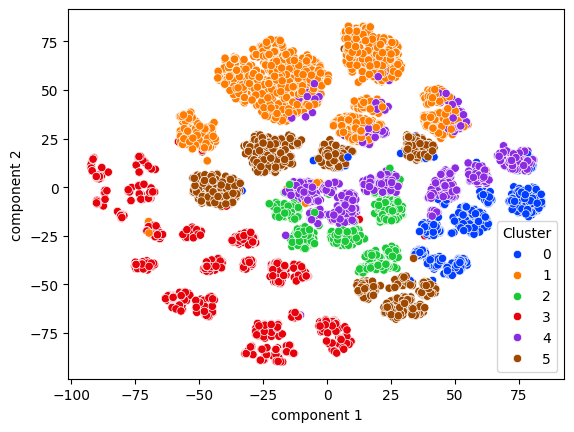

In [150]:
tsne_6 = TSNE(n_components = 2, random_state = 42)
data_tsne_6 = tsne_6.fit_transform(data_prepared)
df_tsne_6 = pd.DataFrame(data_tsne_6, columns = ['component 1', 'component 2'])
df_tsne_labels_kmeans6 = pd.concat([df_tsne_6,df_kmeans_6_labels], axis = 1)
df_tsne_labels_kmeans6
sns.scatterplot(x = 'component 1', y = 'component 2', data = df_tsne_labels_kmeans6, hue = 'Cluster', palette ='bright');

### **AgglomerativeClustering with 5 clusters**

In [152]:
df_agg_5 = pd.DataFrame(agg_labels_5, columns = ['Cluster'])

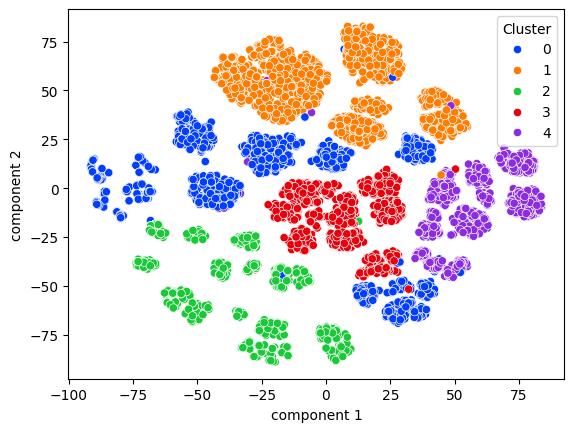

In [153]:
tsne_agg_5 = TSNE(n_components = 2)
data_tsne_agg_5 = tsne_agg_5.fit_transform(data_prepared)
df_tsne_agg_5 = pd.DataFrame(data_tsne_agg_5, columns = ['component 1', 'component 2'])
df_tsne_labels_agg5 = pd.concat([df_tsne_agg_5,df_agg_5], axis = 1)
df_tsne_labels_agg5
sns.scatterplot(x = 'component 1', y = 'component 2', data = df_tsne_labels_agg5, hue = 'Cluster', palette ='bright');

#### **Isolation Forest** 

##### **Contamination = 0.05**

In [156]:
df_agg_5_v2 = pd.concat([data_prepared, df_agg_5.copy()], axis =1)
model_agg_5_v2 = IsolationForest(contamination = 0.05, random_state = 42)
model_agg_5_v2.fit(data_prepared.values)
df_agg_5_v2['anomaly_scores'] = model_agg_5_v2.decision_function(data_prepared.values)
df_agg_5_v2['anomaly'] = model_agg_5_v2.predict(data_prepared.values)
df_agg_5_without_anomalies_v2 = df_agg_5_v2[df_agg_5_v2['anomaly'] != -1].reset_index(drop=True)

##### **Contamination = 0.08**

In [158]:
df_agg_5_v3 = pd.concat([data_prepared, df_agg_5.copy()], axis =1)
model_agg_5_v3 = IsolationForest(contamination = 0.08, random_state = 42)
model_agg_5_v3.fit(data_prepared.values)
df_agg_5_v3['anomaly_scores'] = model_agg_5_v3.decision_function(data_prepared.values)
df_agg_5_v3['anomaly'] = model_agg_5_v3.predict(data_prepared.values)
df_agg_5_without_anomalies_v3 = df_agg_5_v3[df_agg_5_v3['anomaly'] != -1].reset_index(drop=True)

#### **t-SNE again** for agglomerative clustering k=5

##### **+ Isolation Forest with contamination = 0.05**

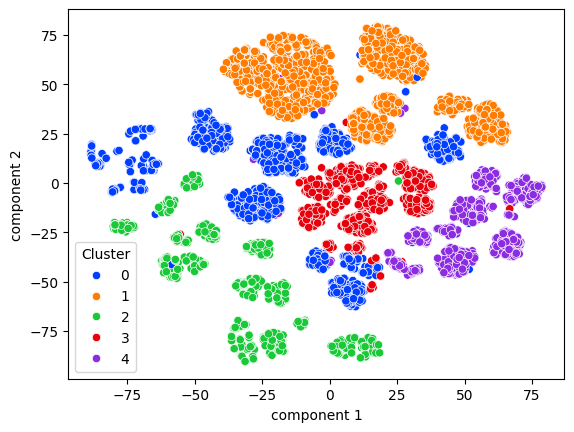

In [161]:
tsne_agg_5_v2 = TSNE(n_components = 2)
data_tsne_agg_5_v2 = tsne_agg_5_v2.fit_transform(df_agg_5_without_anomalies_v2.iloc[:,:-3])
df_tsne_agg_5_v2 = pd.DataFrame(data_tsne_agg_5_v2, columns = ['component 1', 'component 2'])
df_tsne_labels_agg5_v2 = pd.concat([df_tsne_agg_5_v2,df_agg_5_without_anomalies_v2['Cluster']], axis = 1)
df_tsne_labels_agg5_v2
sns.scatterplot(x = 'component 1', y = 'component 2', data = df_tsne_labels_agg5_v2, hue = 'Cluster', palette ='bright');

##### **+ Isolation Forest with contamination = 0.08** 

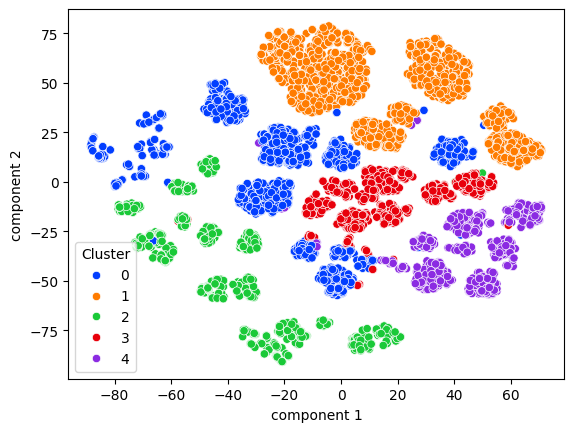

In [163]:
tsne_agg_5_v3 = TSNE(n_components = 2)
data_tsne_agg_5_v3 = tsne_agg_5_v3.fit_transform(df_agg_5_without_anomalies_v3.iloc[:,:-3])
df_tsne_agg_5_v3 = pd.DataFrame(data_tsne_agg_5_v3, columns = ['component 1', 'component 2'])
df_tsne_labels_agg5_v3 = pd.concat([df_tsne_agg_5_v3,df_agg_5_without_anomalies_v3['Cluster']], axis = 1)
df_tsne_labels_agg5_v3
sns.scatterplot(x = 'component 1', y = 'component 2', data = df_tsne_labels_agg5_v3, hue = 'Cluster', palette ='bright');

In [164]:
# There is no significant change after removing 5% or 8% of observations. Actually, I would even say that removing observations does not cause clusters to become clearer or more distinct
# Just maybe observations from cluster 0 are closer.

# t-SNE is generally robust to small amounts of noise and outliers. If the outliers were few and not central to the clusters, t-SNE might still have produced a similar visualization even after their removal.

#The minor changes after removing outliers suggest that  clusters were already well-formed and robust, with the outliers having minimal impact. This is a good sign, as it means the clustering results are stable.

# I would keep model with 5% removal at the end. This might provide a minor adjustment and could help in reducing noise while retaining the majority of data.

### **DBSCAN eps = 3, min_samples = 8**

In [166]:
df_dbscan_labels = pd.DataFrame(dbscan.labels_, columns = ['Cluster'])

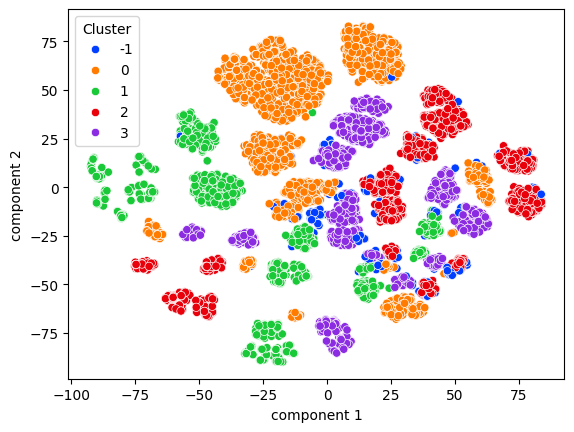

In [167]:
tsne_dbscan = TSNE(n_components = 2, random_state = 42)
data_tsne_dbscan = tsne_dbscan.fit_transform(data_prepared)
df_tsne_dbscan = pd.DataFrame(data_tsne_dbscan, columns = ['component 1', 'component 2'])
df_tsne_labels_dbsacn = pd.concat([df_tsne_dbscan,df_dbscan_labels], axis = 1)
df_tsne_labels_dbsacn
sns.scatterplot(x = 'component 1', y = 'component 2', data = df_tsne_labels_dbsacn, hue = 'Cluster', palette ='bright');

## **6. Model comparison** <a id="chapter6"></a>

t-SNE: Are clusters well-separated or overlapping? 

Kmeans: 

K = 4 - clusters are quite well separate, some of them are spherical

K = 5 - clusters worse defined than for k=4 but they look quite decently too. 

Removal of 5% or 8% of observations did not change a lot. 

K = 6 - some of clusters are well-separated some of them no, the worst among the kmeans algorithms

Among all the kmeans algorithms, the best one is for K=4 

Agglomerative clustering K=5 ->compact and well-defined clusters, irregular shapes but also spherical.

Removal of 5% or 8% of observations did not change a lot. Since removing a small proportion of data doesn't change the clusters substantially, it indicates that clusters are relatively stable. This is a positive sign.

DBSCAN - a lot is happening on the plot; clusters vary in shapes and density, with some areas of high density and others where points are more spread out;
clusters are not well-defined. DBSCAN should also highlight outliers, which should be represented as isolation points in the t-SNE plot.

Kmeans and Agglomerative clustering suggest 5 clusters. DBSCAN suggests 4 cluster, however as I investigated earlier with kmean k=4 one cluster could be split into two distinct clusters. Apart from that Agglomerative clustering shows more distinct clusters than the other models. 

**For final model I would consider either kmeans k=5 or agglomerative clustering K=5 with removal of 5% of obs.**

#### Let's investigate characteristics of clients using Agglomerative clustering for K=5 without 5% of observations

In [173]:
final_dataset_with_clusters = pd.concat([data_original, df_agg_5_v2.iloc[:,-3:]], axis = 1)
final_dataset_with_clusters_reduced = final_dataset_with_clusters[final_dataset_with_clusters['anomaly'] != -1].reset_index(drop=True)
final_dataset_with_clusters_reduced = final_dataset_with_clusters_reduced.drop(['anomaly_scores', 'anomaly'], axis = 1)
final_dataset_with_clusters_reduced

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6685,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,3
6686,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,3
6687,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
6688,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0


In [174]:
final_dataset_with_clusters_reduced['Cluster'].value_counts()

Cluster
1    1918
0    1723
2    1197
3     934
4     918
Name: count, dtype: int64

In [175]:
data_cluster_0 = final_dataset_with_clusters_reduced[final_dataset_with_clusters_reduced['Cluster'] == 0]
data_cluster_1 = final_dataset_with_clusters_reduced[final_dataset_with_clusters_reduced['Cluster'] == 1]
data_cluster_2 = final_dataset_with_clusters_reduced[final_dataset_with_clusters_reduced['Cluster'] == 2]
data_cluster_3 = final_dataset_with_clusters_reduced[final_dataset_with_clusters_reduced['Cluster'] == 3]
data_cluster_4 = final_dataset_with_clusters_reduced[final_dataset_with_clusters_reduced['Cluster'] == 4]

In [176]:
round((final_dataset_with_clusters_reduced['Cluster'].value_counts() / final_dataset_with_clusters_reduced.shape[0])*100,2)

Cluster
1    28.67
0    25.75
2    17.89
3    13.96
4    13.72
Name: count, dtype: float64

In [177]:
for feature in data_cluster_4:
    print()
    print(data_cluster_4[feature].value_counts())  
    print()
    print('---------')


Gender
Male      463
Female    455
Name: count, dtype: int64

---------

SeniorCitizen
0    845
1     73
Name: count, dtype: int64

---------

Partner
Yes    685
No     233
Name: count, dtype: int64

---------

Dependents
No     534
Yes    384
Name: count, dtype: int64

---------

Tenure
72    254
71     83
70     63
68     42
69     38
67     32
65     29
66     28
63     24
64     24
60     20
62     19
61     19
54     16
52     15
56     14
57     13
59     12
45     10
47     10
49     10
58     10
48      9
55      9
46      9
50      8
43      7
51      6
37      6
42      6
33      5
35      5
53      5
31      4
38      4
23      4
36      4
39      4
44      3
0       3
13      3
34      3
30      3
41      3
25      2
26      2
24      2
8       2
14      2
21      2
27      1
3       1
20      1
6       1
32      1
16      1
10      1
15      1
Name: count, dtype: int64

---------

PhoneService
Yes    841
No      77
Name: count, dtype: int64

---------

MultipleLines
Yes  

In [178]:
data_cluster_0.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Cluster
count,1723.000000,1723.000000,1723.000000,1723.000000,1723.0
mean,0.108532,13.510737,48.238392,722.949071,0.0
std,0.311141,14.867954,20.545115,928.388477,0.0
min,0.000000,1.000000,18.800000,18.850000,0.0
25%,0.000000,2.000000,29.650000,75.475000,0.0
50%,0.000000,7.000000,49.550000,324.250000,0.0
75%,0.000000,20.000000,60.900000,1024.525000,0.0
max,1.000000,68.000000,112.950000,5794.450000,0.0


In [179]:
# cluster0: no partner, no multiple lines, DSL, no other services, month to month, checks  
# cluster1: no partner, has multiple lines, fiber optic, no other services, only month to month, electronic checks, 
# cluster2: no multiple lines, no internet, no other services, two year, automatic, 
# cluster3: has partner, fiber optic/DSL, other services yes/no, one year, automatic, 
# cluster4: has partner, has multiple lines, DSL, other services, two year, automatic, 


# cluster0: tenure mean/median: 14/7m ~ 1y , monthly charges: $49 
# cluster1: tenure mean/median: 22/17m ~ 1.5/2y, monthly charges: $87
# cluster2: tenure mean/median: 37m ~ 3y, monthly charges: $21 
# cluster3: tenure mean/median: 46/49m ~ 4y, monthly charges: $83 
# cluster4: tenure mean/median: 63/68m ~ 5.5y, monthly charges: $87 

# In each cluster: no senior citizen, no dependents, there is phone service

 How churn is distributed inside each group?

In [181]:
churn_clusters = pd.concat([final_dataset_with_clusters_reduced['Churn'].map({'Yes':1, 'No':0}), final_dataset_with_clusters_reduced['Cluster']], axis =1)

In [182]:
#churn_clusters.groupby('Cluster')['Churn'].mean().sort_values(ascending = False).round(2)

Model Agg 5 clusters with removal of 5% of obs.

|                           | 0            |         1          |   2      |    3          |      4     |
|:--------:                 |:--------:    |:--------:          |:--------:|:--------:     |:--------:  |
|  internet                 |  DSL         |  fiber optic       |No        |fiber optic/DSL|  DSL       |
|  other services           |  No          |  No                |No        |  Yes/No       |  Yes       |
|  multiple lines           |  No          |  Yes               |No        |  -            |  Yes       |
|  contract                 |  m-m         | m-m                |2y        |  1y           |      2y    |
|  payment                  |  checks      |  electronic checks |automatic |automatic      |  automatic |
|  tenure  [year]           |  1           |  1.5/2             |3         |  4            |  5.5       | 
|  partner                  |  No          |  No                |-         |  Yes          |  Yes       |
| monthly charges [$]       |  49          |  87                |21        |  83           |  87        |
|  churn  [%]               |  32          |  55                |4         |  14           |  4         |  
|nr of observations         |  1723        |  1918              |1197      |  934          |  918       |
|distribution percentage [%]| 25.75        |  28.67             |17.89     |13.96          |  13.72     |

## **7. Model selection** <a id="chapter7"></a>

#### **Kmeans K = 5 vs. Agglomerative clustering K=5 without 5% of observations**

Model Agg K = 5 with removal of 5% of obs

|                           | 0            |         1          |   2      |    3          |      4     |
|:--------:                 |:--------:    |:--------:          |:--------:|:--------:     |:--------:  |
|  internet                 |  DSL         |  fiber optic       |No        |fiber optic/DSL|  DSL       |
|  other services           |  No          |  No                |No        |  Yes/No       |  Yes       |
|  multiple lines           |  No          |  Yes               |No        |  -            |  Yes       |
|  contract                 |  m-m         | m-m                |2y        |  1y           |      2y    |
|  payment                  |  checks      |  electronic checks |automatic |automatic      |  automatic |
|  tenure  [year]           |  1           |  1.5/2             |3         |  4            |  5.5       | 
|  partner                  |  No          |  No                |-         |  Yes          |  Yes       |
| monthly charges [$]       |  49          |  87                |21        |  83           |  87        |
|  churn  [%]               |  32          |  55                |4         |  14           |  4         |  
|nr of observations         |  1723        |  1918              |1197      |  934          |  918       |
|distribution percentage [%]| 25.75        |  28.67             |17.89     |13.96          |  13.72     |

Model Kmeans K = 5

|                           | 0            |         1          |   2      |    3        |         4           |
|:--------:                 |:--------:    |:--------:          |:--------:|:--------:   |:--------:           |
|  internet                 |  DSL         |  fiber optic       |DSL       |  No         |  fiber optic        |
|  other services           |  Yes         |  No                |No        |  No         |  Yes                |
|  multiple lines           |  -           |  Yes               |No        |  No         |  Yes                |
|  contract                 |  2/1y        | m-m                |m-m       |  2y/m-m     |  1/2y               |
|  payment                  |  automatic   |  electronic checks |checks    |mailed checks|  automatic + electronic checks |
|  dependents               |  -           |  No                |No        |  -          |  No                 |
|  tenure  [year]           |  4           |  1/1.5             |1         |  2/2.5      |  5                  |    
| monthly charges [$]       |  70          |  85                |50        |  20         |  100                |
|  churn       [%]          |  32.39       |  55.06             |3.76      |  14.45      |  4.25               |   
|nr of observations         |  1156        |  1968              |1245      |  1538       |  1136               |
|distribution percentage [%]| 16.41        |  27.94             |17.68     |  21.84      |  16.13              |

4 clusters are almost identical, the only one that is different is for agg cluster 3 and for kmean cluster 4. 

The ambiguity in the internet and other services features within the agg model for cluster 3 (e.g., "fiber optic/DSL," "Yes/No") leads to less coherent and homogenous cluster. In contrast, the K-means model produces more distinct and consistent cluster, with clearly defined and homogeneous feature sets. This makes the K-means clusters easier to interpret and more actionable, which is why I would choose the K-means model. 

The one who churn has: 
* fiber optic
* no other services
* has multiple lines
* m-m contracts
* use electronic checks
* does not have a partner
* low tenure around 1.5 year
* quite high monthly charges around $85

 **Final model: kmean with 5 clusters**

## **8. Recommendations** <a id="chapter8"></a>

 **Final model: kmean with 5 clusters**

#### Create a model

In [197]:
kmeans_5 = KMeans(n_clusters = 5, n_init = 'auto', random_state = 42)
kmeans_5.fit(data_transformed)
kmeans_5_labels = kmeans_5.labels_

Counter(kmeans_5_labels)

Counter({1: 1968, 3: 1538, 2: 1245, 0: 1156, 4: 1136})

#### Cluster centers

In [199]:
kmeans_5_cluster_centers = kmeans_5.cluster_centers_
cluster_centers_5_df = pd.DataFrame(kmeans_5_cluster_centers, columns = data_transformed.columns)
cluster_centers_5_df.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,2.20,-1.64,1.30,0.12,0.01,-0.00,-0.02,0.04,0.04,0.02,0.21,-0.06,0.24,0.14,0.09
1,-0.52,2.14,-0.46,-0.24,-0.05,0.05,0.04,-0.13,-0.15,-0.01,-0.00,0.14,-0.08,-0.18,-0.02
2,-1.05,0.06,2.10,-0.34,0.05,0.07,-0.25,-0.10,-0.12,0.11,0.05,-0.08,0.18,0.40,-0.01
3,-2.02,-1.91,-1.30,0.08,-0.05,-0.07,-0.05,0.25,0.29,-0.06,-0.09,-0.10,-0.03,0.01,0.02
4,2.54,0.48,-1.08,0.56,0.08,-0.07,0.28,-0.05,-0.05,-0.04,-0.14,0.03,-0.26,-0.28,-0.07


In [200]:
# data_transformed.mean() # mean ~ 0 (we standardized data before)
# cluster centers: positive - above the mean, negative - below the mean

##### Heatmap

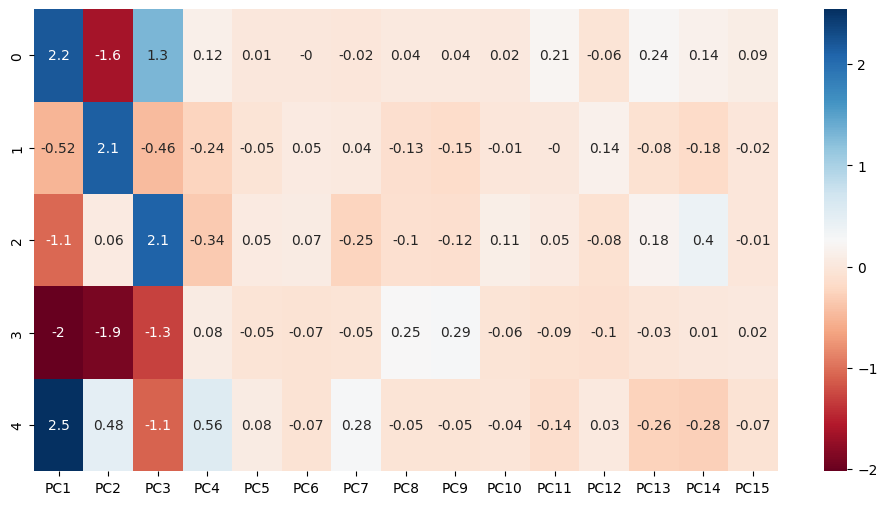

In [202]:
plt.figure(figsize=(12, 6)) 
sns.heatmap(cluster_centers_5_df.round(2), cmap ='RdBu', annot = True);

In [203]:
# cluster 0: PC1 & PC3 are high, PC2 is very low
# cluster 1: PC2 high
# cluster 2: PC1 is low, PC3 is high
# cluster 3: PC1,PC2,PC3 are low 
# cluster 4: PC1 is very high, PC3 low 

#The rest of components are very close to 0 in any cluster -> so the most informative components are for us PC1,PC2 and PC3

# PC1: High positive values in PC1 indicate a strong association with the features contributing positively to PC1, while negative values indicate a strong association with features contributing negatively.
# PC2: Similarly, PC2 represents another direction of variance, orthogonal to PC1.
# PC3: This captures the third most significant direction of variance, orthogonal to both PC1 and PC2

In [204]:
# From file: Churn - dataPrep_EDA_PCA
# + features with high positive loadings 
# - features with high negative loadings
# positive/negative shows only direction in which we are moving on the axis 

# Component 1: 
# + tenure &  multiple lines, higher engagement with additional services (like security and backup, streaming) -> loyal, eager clients
# - no internet, contract month to month & mailed check ->lower commitment, non-tech-savvy, flexible 


# Component 2: 
# + fiber optic,month to month contract,electronic check & senior, paperless billing -> client prefers modern technology (fiber optic), flexibility (month to month) and digital convenience
# - no internet service,two years contract & have dependents -> a lack of commitment, prefer stable situation

# Component 3: 
# + DSL & online security, tech support, contract 2 years, tenure, have partner -> clients who value secure, stable, and long-term relationships
# - phone service & multiple lines, fiber optic, no internet service -> more than internet client care about phones

In [205]:
# cluster 0: loyal, eager clients who value secure, stable, and long-term relationships, a lack of commitment, prefer stable situation
# cluster 1: client prefers modern technology (fiber optic), flexibility (month to month) and digital convenience
# cluster 2: lower commitment, non-tech-savvy, flexible, clients who value secure, stable, and long-term relationships
# cluster 3: lower commitment, non-tech-savvy, flexible, lack of commitment, prefer stable situation,  more than internet client care about phones
# cluster 4: loyal, eager clients, more than internet client care about phones

#### Original data + clusters

In [207]:
df_kmeans_5_labels = pd.DataFrame(kmeans_5_labels, columns = ['Cluster'])
#df_kmeans_5_labels

In [208]:
data_original_kmean_labels = pd.concat([data_original, df_kmeans_5_labels], axis=1)
data_original_kmean_labels

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,4
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,2
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


In [209]:
data_cluster_0 = data_original_kmean_labels[data_original_kmean_labels['Cluster'] == 0]
data_cluster_1 = data_original_kmean_labels[data_original_kmean_labels['Cluster'] == 1]
data_cluster_2 = data_original_kmean_labels[data_original_kmean_labels['Cluster'] == 2]
data_cluster_3 = data_original_kmean_labels[data_original_kmean_labels['Cluster'] == 3]
data_cluster_4 = data_original_kmean_labels[data_original_kmean_labels['Cluster'] == 4]

#### **Cluster names**

In [211]:
#PC interpretation
# cluster 0: loyal, eager clients who value secure, stable, and long-term relationships, a lack of commitment, prefer stable situation
# cluster 1: client prefers modern technology (fiber optic), flexibility (month to month) and digital convenience
# cluster 2: lower commitment, non-tech-savvy, flexible, clients who value secure, stable, and long-term relationships
# cluster 3: lower commitment, non-tech-savvy, flexible, lack of commitment, prefer stable situation,  more than internet client care about phones
# cluster 4: loyal, eager clients, more than internet client care about phones

Summary table

|                           | 0            |         1          |   2      |    3        |         4           |
|:--------:                 |:--------:    |:--------:          |:--------:|:--------:   |:--------:           |
|  internet                 |  DSL         |  fiber optic       |DSL       |  No         |  fiber optic        |
|  other services           |  Yes         |  No                |No        |  No         |  Yes                |
|  multiple lines           |  -           |  Yes               |No        |  No         |  Yes                |
|  contract                 |  2/1y        | m-m                |m-m       |  2y/m-m     |  1/2y               |
|  payment                  |  automatic   |  electronic checks |checks    |mailed checks|  automatic + electronic checks |
|  dependents               |  -           |  No                |No        |  -          |  No                 |
|  tenure  [year]           |  4           |  1/1.5             |1         |  2/2.5      |  5                  |    
| monthly charges [$]       |  70          |  85                |50        |  20         |  100                |
|  churn       [%]          |  32.39       |  55.06             |3.76      |  14.45      |  4.25               |   
|distribution percentage [%]| 16.41        |  27.94             |17.68     |  21.84      |  16.13              |

In [214]:
# cluster 0: stable dedicated subscribers
# cluster 1: tech-savvy, flexible users
# cluster 2: low-commitment traditionalists
# cluster 3: phone-centrics minimalists
# cluster 4: premium service enthusiast

#### **Recommendation** - how to minimize churn across clusters? 

#### **Cluster 1**

Focus on retention (55.06% churn)

Key issues: *High churn due to month-to-month contracts, short tenure, and reliance on electronic checks*

Recommendations:
* Incentivize longer contracts: offer discounts or perks (e.g., free equipment, priority support) for switching to longer-term contracts
* Bundle offers: introduce service bundles (e.g., adding TV or phone services) to increase stickiness
* Loyalty programs: implement a rewards program for customers who stay beyond a certain period

#### **Cluster 0**

Enhance value proposition (32.39% churn) 

Key Issues: *Moderate churn with a mix of DSL internet and longer contracts*

Recommendations:
* Upgrade offers: encourage switching to fiber optic with limited-time offers
* Value-Added services: introduce additional services or features that cater to their needs, such as advanced security or tech support
* Monitor satisfaction: regularly survey customers to identify pain points and address them proactively

#### **Cluster 3**

Increase service value (14.45% churn) 

Key Issues: *Customers without internet service, moderate churn with a mailed checks payment method*

Recommendations:
* Promote internet service: offer compelling promotions for internet service, possibly with a discount for bundling with existing services
* Simplify payment methods: encourage the adoption of automatic or electronic payments with discounts or rewards
* Engagement campaigns: use targeted communication to keep these customers informed about offers and new services

#### **Cluster 4**

Maintain Satisfaction (4.25% churn) 

Key Issues: *Low churn, customers with fiber optic, other services, and long tenure*

Recommendations:
* Customer appreciation: regularly acknowledge their loyalty with exclusive offers, early access to new services, or personalized discounts
* Monitor competitor offers: ensure that your offerings remain competitive to prevent churn due to better deals elsewhere
* Upsell opportunities: identify opportunities to upsell additional services or premium plans to these satisfied customers

#### **Cluster 2**

Maintain Status Quo (3.76% churn)

Key Issues: *Very low churn, month-to-month contracts with checks payment* 

Recommendations:
* Low-impact changes: ensure any changes to service or pricing don’t disrupt the satisfaction of this group
* Service consistency: focus on maintaining service quality and reliability
* Retention bonuses: consider offering small loyalty bonuses or perks to encourage these customers to stay long-term